1. Business Understanding
Objective: The goal here appears to be understanding the trade balance over time, including exports, imports, and services between different periods. The dataset includes fields such as balance totals, balance for goods, balance for services, total exports, and imports.

2. Domain Knowledge
Context: The dataset likely represents trade balance data for a country or a region over several years (possibly decades). The terms used are standard in economic data reporting:

3. Data Cleaning
The data cleaning process is crucial for preparing the dataset for analysis. Based on the notebook, here are the steps:

4. Data Analysis
The next phase involves exploring the cleaned dataset to extract insights:

Descriptive Statistics: Provides a summary of the dataset, such as the mean and standard deviation of the "Period" column (which likely represents years).

df.describe()

Output shows that data spans from 1960 to 2015, with missing data for some years.

Exploring Trends: By calculating trends across key metrics (e.g., balance over time), we can identify whether exports, imports, or the 
overall trade balance shows a pattern of growth, decline, or stability.

Correlation Analysis: Checking correlations between columns to understand how different aspects of trade (e.g., goods vs. services) might relate.

5. Data Visualisation

Visualization refers to the graphical representation of data, where complex information is translated into visual formats like charts, graphs, and maps. The purpose of visualization is to make data easier to understand by revealing patterns, trends, and correlations that might not be evident from raw numbers or tables alone.



In [4]:
import pandas as pd

In [5]:
# Load the dataset
data_path = 'gands.csv'
df = pd.read_csv(data_path)

In [6]:
#Basic Exploration
print("Dimensions of dataset:", df.shape) 
print("\Attributes in the dataset:", df.columns.tolist())  
df.head()  
df.tail()

Dataset Shape: (107, 10)

Columns in the dataset: ['Period', 'Balance Total', 'Balance Goods BOP', 'Balance Services', 'Exports Total', 'Exports Goods BOP', 'Exports Services', 'Imports Total ', 'Imports Goods BOP', 'Imports Services']

First 5 rows of the dataset:
    Period Balance Total Balance Goods BOP Balance Services Exports Total  \
0  1960.0         3,508             4,892           -1,384        25,940   
1  1961.0         4,195             5,571           -1,376        26,403   
2  1962.0         3,370             4,521           -1,151        27,722   
3  1963.0         4,210             5,224           -1,014        29,620   
4  1964.0         6,022             6,801             -779        33,341   

  Exports Goods BOP Exports Services Imports Total  Imports Goods BOP  \
0            19,650            6,290         22,432            14,758   
1            20,108            6,295         22,208            14,537   
2            20,781            6,941         24,352      

In [7]:
#summary of the dataset
 df.describe()



Statistical Summary:
             Period
count    56.000000
mean   1987.500000
std      16.309506
min    1960.000000
25%    1973.750000
50%    1987.500000
75%    2001.250000
max    2015.000000


In [8]:

print(df.info())  

Dataset Structure:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Period             56 non-null     float64
 1   Balance Total      56 non-null     object 
 2   Balance Goods BOP  56 non-null     object 
 3   Balance Services   56 non-null     object 
 4   Exports Total      56 non-null     object 
 5   Exports Goods BOP  56 non-null     object 
 6   Exports Services   56 non-null     object 
 7   Imports Total      56 non-null     object 
 8   Imports Goods BOP  56 non-null     object 
 9   Imports Services   56 non-null     object 
dtypes: float64(1), object(9)
memory usage: 8.5+ KB
None


In [9]:
# List of columns 
print("\nList of Columns:\n")
print(df.columns)


List of Columns:

Index(['Period', 'Balance Total', 'Balance Goods BOP', 'Balance Services',
       'Exports Total', 'Exports Goods BOP', 'Exports Services',
       'Imports Total ', 'Imports Goods BOP', 'Imports Services'],
      dtype='object')


In [10]:
#  Basic statistics summary of the dataset 
print("\nStatistical Summary of the dataset:\n")
print(df.describe(include='all'))


Statistical Summary of the dataset:

             Period Balance Total Balance Goods BOP Balance Services  \
count     56.000000            56                56               56   
unique          NaN            56                56               56   
top             NaN         3,508             4,892           -1,384   
freq            NaN             1                 1                1   
mean    1987.500000           NaN               NaN              NaN   
std       16.309506           NaN               NaN              NaN   
min     1960.000000           NaN               NaN              NaN   
25%     1973.750000           NaN               NaN              NaN   
50%     1987.500000           NaN               NaN              NaN   
75%     2001.250000           NaN               NaN              NaN   
max     2015.000000           NaN               NaN              NaN   

       Exports Total Exports Goods BOP Exports Services Imports Total   \
count             56   

In [11]:
# Handle Missing Values
print("\nMissing Values in each column:\n", df.isnull().sum())

# Dropping rows with all missing values
df.dropna(how='all', inplace=True)


Missing Values in each column:
 Period               51
Balance Total        51
Balance Goods BOP    51
Balance Services     51
Exports Total        51
Exports Goods BOP    51
Exports Services     51
Imports Total        51
Imports Goods BOP    51
Imports Services     51
dtype: int64


In [12]:
print("\nNumber of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)



Number of duplicate rows: 0


In [14]:
df.columns = df.columns.str.strip()
# Convert 'Period' to datetime
df['Period'] = pd.to_datetime(df['Period'], errors='coerce')

# Convert relevant object columns to numeric
numeric_columns = [
    'Balance Total',
    'Balance Goods BOP',
    'Balance Services',
    'Exports Total',
    'Exports Goods BOP',
    'Exports Services',
    'Imports Total',
    'Imports Goods BOP',
    'Imports Services'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').replace('nan', '0'), errors='coerce')

print("\nUpdated Data Types:")
print(df.dtypes)

print("\nUpdated DataFrame:")
print(df.head())



Updated Data Types:
Period               datetime64[ns]
Balance Total                 int64
Balance Goods BOP             int64
Balance Services              int64
Exports Total                 int64
Exports Goods BOP             int64
Exports Services              int64
Imports Total                 int64
Imports Goods BOP             int64
Imports Services              int64
dtype: object

Updated DataFrame:
                         Period  Balance Total  Balance Goods BOP  \
0 1970-01-01 00:00:00.000001960           3508               4892   
1 1970-01-01 00:00:00.000001961           4195               5571   
2 1970-01-01 00:00:00.000001962           3370               4521   
3 1970-01-01 00:00:00.000001963           4210               5224   
4 1970-01-01 00:00:00.000001964           6022               6801   

   Balance Services  Exports Total  Exports Goods BOP  Exports Services  \
0             -1384          25940              19650              6290   
1             -1376 

In [15]:
#  Basic statistics summary of the dataset 
print("\nStatistical Summary of the dataset:\n")
print(df.describe(include='all'))


Statistical Summary of the dataset:

                              Period  Balance Total  Balance Goods BOP  \
count                             56      56.000000          56.000000   
mean   1970-01-01 00:00:00.000001987 -187736.089286     -239605.892857   
min    1970-01-01 00:00:00.000001960 -761716.000000     -837289.000000   
25%    1970-01-01 00:00:00.000001973 -375331.250000     -453898.500000   
50%    1970-01-01 00:00:00.000001987  -87002.500000     -115120.500000   
75%    1970-01-01 00:00:00.000002001   -3545.250000       -4693.750000   
max    1970-01-01 00:00:00.000002015   12404.000000        8903.000000   
std                              NaN  237806.243190      292109.320309   

       Balance Services  Exports Total  Exports Goods BOP  Exports Services  \
count         56.000000   5.600000e+01       5.600000e+01         56.000000   
mean       51869.732143   6.892564e+05       4.909360e+05     198320.446429   
min        -1384.000000   2.594000e+04       1.965000e+04 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Descriptive Statistics
print(df.describe())

Descriptive Statistics:
                              Period  Balance Total  Balance Goods BOP  \
count                             56      56.000000          56.000000   
mean   1970-01-01 00:00:00.000001987 -187736.089286     -239605.892857   
min    1970-01-01 00:00:00.000001960 -761716.000000     -837289.000000   
25%    1970-01-01 00:00:00.000001973 -375331.250000     -453898.500000   
50%    1970-01-01 00:00:00.000001987  -87002.500000     -115120.500000   
75%    1970-01-01 00:00:00.000002001   -3545.250000       -4693.750000   
max    1970-01-01 00:00:00.000002015   12404.000000        8903.000000   
std                              NaN  237806.243190      292109.320309   

       Balance Services  Exports Total  Exports Goods BOP  Exports Services  \
count         56.000000   5.600000e+01       5.600000e+01         56.000000   
mean       51869.732143   6.892564e+05       4.909360e+05     198320.446429   
min        -1384.000000   2.594000e+04       1.965000e+04       6290.000

Key statistics:

Mean Balance Total: -187,736 (indicating an average trade deficit over time).

Mean Exports Total: 689,256

Mean Imports Total: 876,992

Trade Deficit: On average, the country has a negative balance, indicating persistent trade deficits.

Exports and Imports: Both have been growing, with imports slightly outpacing exports, leading to trade deficits.

In [18]:
# Correlation Analysis
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                     Period  Balance Total  Balance Goods BOP  \
Period             1.000000      -0.841873          -0.885931   
Balance Total     -0.841873       1.000000           0.985853   
Balance Goods BOP -0.885931       0.985853           1.000000   
Balance Services   0.835728      -0.715680          -0.822620   
Exports Total      0.924434      -0.871139          -0.939307   
Exports Goods BOP  0.929889      -0.875508          -0.941455   
Exports Services   0.908756      -0.858091          -0.930971   
Imports Total      0.926417      -0.926340          -0.974983   
Imports Goods BOP  0.926235      -0.929598          -0.976828   
Imports Services   0.923166      -0.905627          -0.961224   

                   Balance Services  Exports Total  Exports Goods BOP  \
Period                     0.835728       0.924434           0.929889   
Balance Total             -0.715680      -0.871139          -0.875508   
Balance Goods BOP         -0.822620      -0.

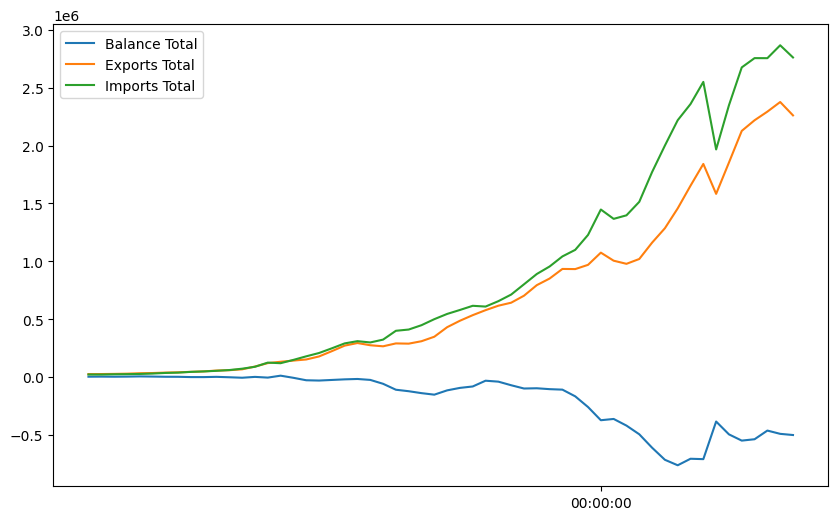

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df['Period'], df['Balance Total'], label='Balance Total')
plt.plot(df['Period'], df['Exports Total'], label='Exports Total')
plt.plot(df['Period'], df['Imports Total'], label='Imports Total')
plt.legend()
plt.show()


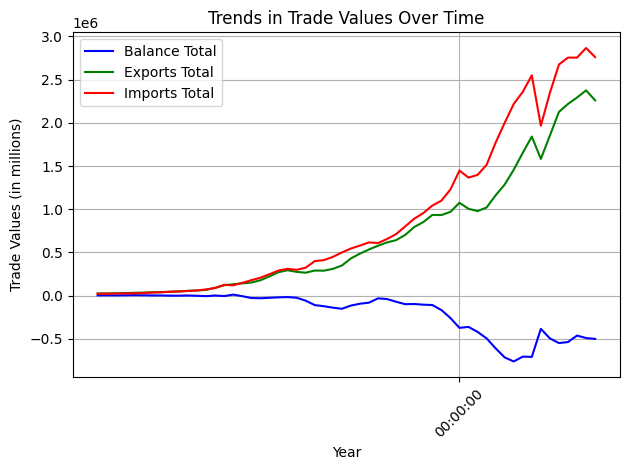

In [22]:

# Plotting Balance Total, Exports Total, and Imports Total over Time
plt.plot(df['Period'], df['Balance Total'], label='Balance Total', color='b')
plt.plot(df['Period'], df['Exports Total'], label='Exports Total', color='g')
plt.plot(df['Period'], df['Imports Total'], label='Imports Total', color='r')

plt.title('Trends in Trade Values Over Time')
plt.xlabel('Year')
plt.ylabel('Trade Values (in millions)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

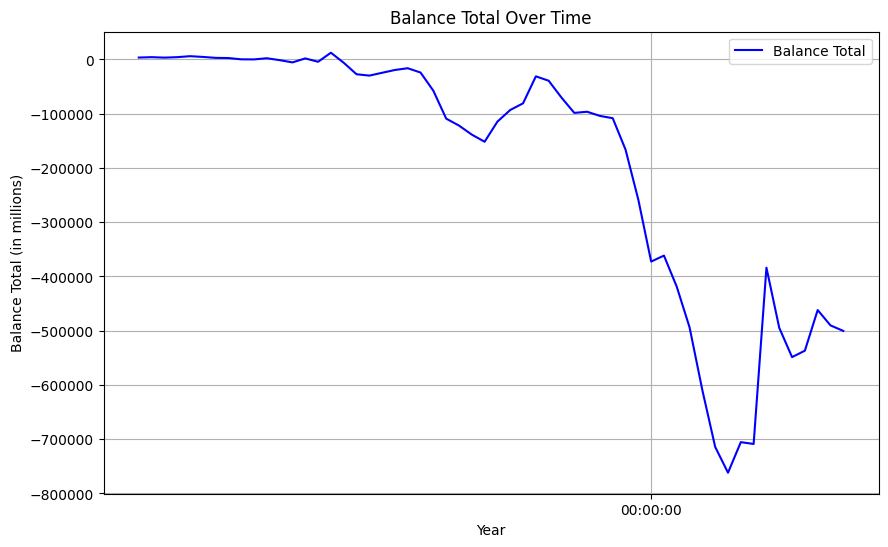

In [29]:

# Set the figure size for all plots
plt.figure(figsize=(10, 6))

# 1. Line plot for Balance Total over time
plt.plot(df['Period'], df['Balance Total'], label='Balance Total', color='b')
plt.title('Balance Total Over Time')
plt.xlabel('Year')
plt.ylabel('Balance Total (in millions)')
plt.legend()
plt.grid(True)
plt.show()

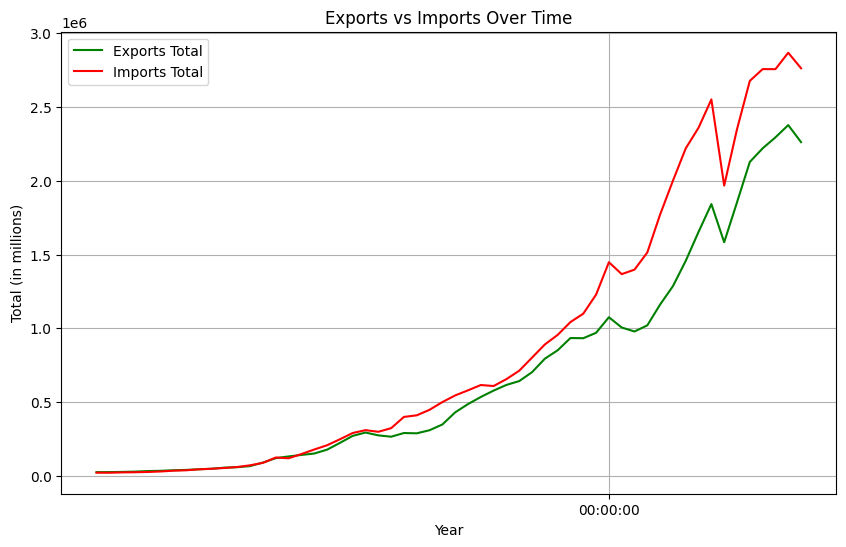

In [33]:

# 2. Plot Exports vs Imports over time
# Strip any leading or trailing whitespace from all column names
df.columns = df.columns.str.strip()

# Now, plot the Imports and Exports data
plt.figure(figsize=(10, 6))
plt.plot(df['Period'], df['Exports Total'], label='Exports Total', color='g')
plt.plot(df['Period'], df['Imports Total'], label='Imports Total', color='r')  # Column name corrected
plt.title('Exports vs Imports Over Time')
plt.xlabel('Year')
plt.ylabel('Total (in millions)')
plt.legend()
plt.grid(True)
plt.show()


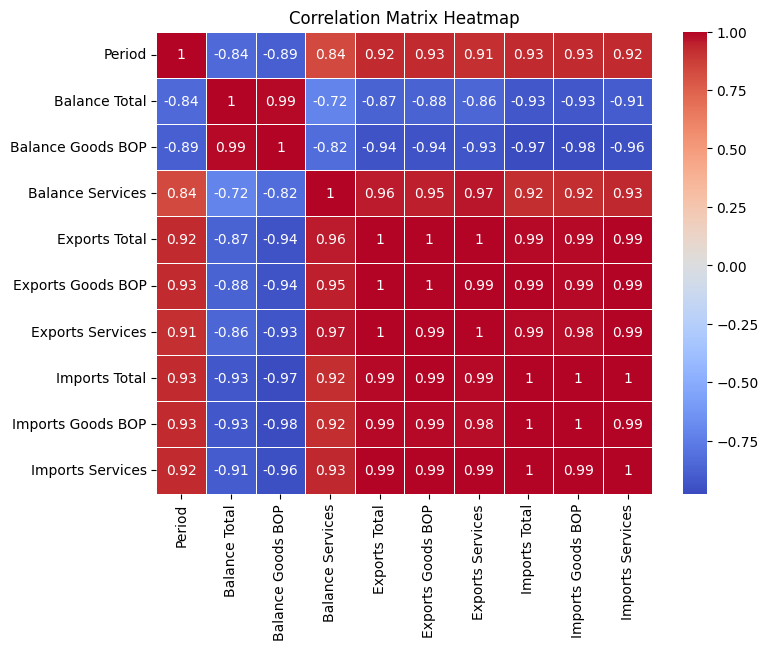

In [31]:


# 3. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [35]:
# Ensure the 'Period' column is in datetime format, and extract the year
df['Period'] = pd.to_datetime(df['Period'], errors='coerce')  # Coerce errors to handle non-datetime entries
df['Year'] = df['Period'].dt.year  # Extract the year from the datetime column

# Check the unique values in the Year column
print("Unique Year values in the dataset:", df['Year'].unique())

# Filter for the specific year range and check if any rows match the condition
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2010)]
print("Filtered dataset shape:", df_filtered.shape)
print(df_filtered.head())  # Preview the first few rows of the filtered data

# Only proceed with plotting if the filtered dataframe is not empty
if not df_filtered.empty:
    # Create the bar chart comparing Balance Goods BOP and Balance Services
    df_filtered[['Year', 'Balance Goods BOP', 'Balance Services']].plot(kind='bar', x='Year', figsize=(10, 6))
    plt.title('Balance of Goods vs Services (2000-2010)')
    plt.ylabel('Balance (in millions)')
    plt.show()
else:
    print("No data available for the specified year range (2000-2010).")


Unique Year values in the dataset: [1970]
Filtered dataset shape: (0, 11)
Empty DataFrame
Columns: [Period, Balance Total, Balance Goods BOP, Balance Services, Exports Total, Exports Goods BOP, Exports Services, Imports Total, Imports Goods BOP, Imports Services, Year]
Index: []
No data available for the specified year range (2000-2010).
